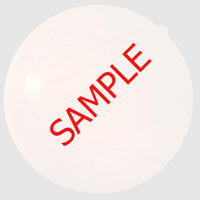

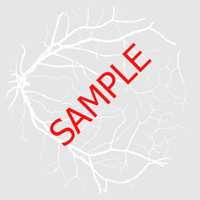

In [30]:
from PIL import Image
import os
from IPython.display import display
 
#Convert images to .jpg if dataset comes in another format
def convert_imgs(path, save_path):
    for infile in os.listdir(path):
        if infile[-3:] == "tif" or infile[-3:] == "gif" :
            # print "is tif or bmp"
            outfile = infile[:-3]# + "jpeg"
            img = Image.open(path+infile)
            area = (0, 19, 565, 584)
            cropped_img = img.crop(area)
            #print ("new filename : ",outfile)
            out = cropped_img.convert("RGB").save(save_path+outfile+'jpg')

convert_imgs('./sample_data/train/', './sample_data/train_jpg/')
convert_imgs('./sample_data/val/', './sample_data/val_jpg/')

# Show examples
img_list = arr = os.listdir("./sample_data/train_jpg/")
for img_path in img_list:
    path="./sample_data/train_jpg/"+img_path
    img = Image.open(path)
    img.thumbnail((200,200))
    display(img)

In [28]:
# Get image pairs for merge
def get_pairs(path):
    imgs_list = os.listdir(path)
    imgs_pair = []
    imgs_pairs_list = []
    for img in imgs_list:
        imgs_pair.append(path + img)
        if len(imgs_pair) == 2:
            imgs_pairs_list.append(imgs_pair)
            imgs_pair = []

    return imgs_pairs_list

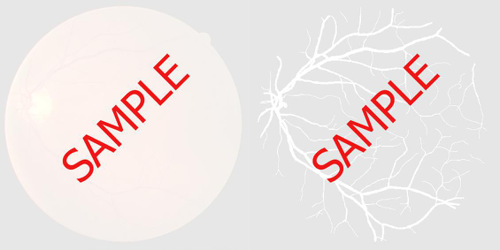

In [29]:
import numpy as np
from PIL import Image

# Merge img and mask into one datasample
def merge_imgs(pairs_arr, save_path):
    counter = 1
    for pair in pairs_arr:        
        images_list = pair
        imgs = [ Image.open(i) for i in images_list ]
        min_img_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
        img_merge = np.hstack( (np.asarray( i.resize(min_img_shape,Image.ANTIALIAS) ) for i in imgs ) )
        img_merge = Image.fromarray( img_merge)
        img_merge.save(save_path+'image_'+str(counter)+'.jpg' )
        counter += 1

merge_imgs(get_pairs('./sample_data/train_jpg/'), './data/train/')
merge_imgs(get_pairs('./sample_data/val_jpg/'), './data/val/')

# Show example
path="./data/train/image_1.jpg"
img = Image.open(path)
img.thumbnail((500,500))
display(img)
